0.0445
KstestResult(statistic=0.0147148904124349, pvalue=0.773591425782964, statistic_location=0.4412148904124349, statistic_sign=-1)
2000
SelectiveInferenceResult(stat=2.874273252717243, alpha=0.05, p_value=0.2604917072809856, inf_p=0.2604917072809856, sup_p=0.26145404534623584, reject_or_not=False, truncated_intervals=[[2.4388455659566954, 3.627745060373943]], search_count=226, detect_count=27, selected_model=None, mappings=None)
SelectiveInferenceResult(stat=-2.500564867501533, alpha=0.05, p_value=0.18461724414928127, inf_p=0.18461724414928127, sup_p=0.18558038279529887, reject_or_not=False, truncated_intervals=[[-2.6681072938364947, -2.1263558547016115]], search_count=264, detect_count=13, selected_model=None, mappings=None)


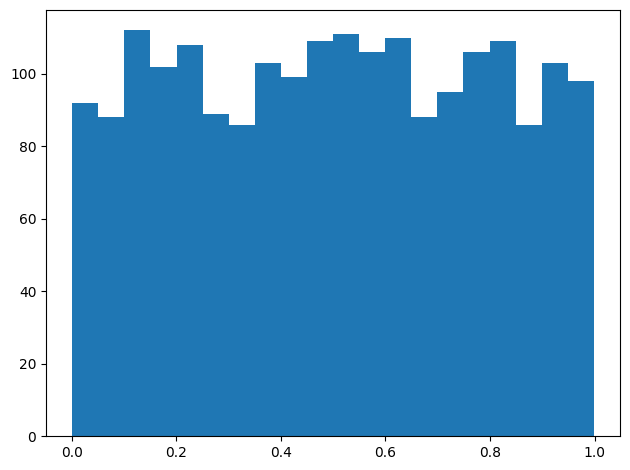

In [21]:
import pickle
import numpy as np
from scipy.stats import kstest
import matplotlib.pyplot as plt

with open('results_cv_op1and2/100_20_0.0_0.pkl', 'rb') as f:
    results = pickle.load(f)
    p_list = np.array([result.p_value for result in results])
    print(np.mean(p_list < 0.05))
    print(kstest(p_list, 'uniform'))
    print(len(p_list))
    plt.hist(p_list, bins=20)
print(results[0])
print(results[1])

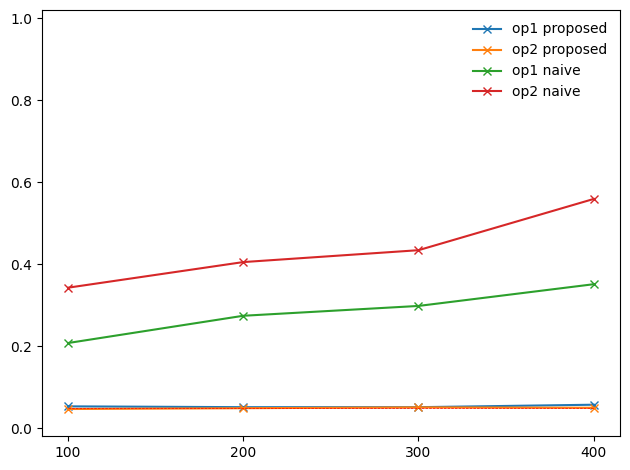

In [53]:
# type I error rate when changing n, not cv
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

num = 2000

op1 = []
op2 = []
op1naive = []
op2naive = []
op1ds = []
op2ds = []

ns = [100, 200, 300, 400]
for n in ns:
    with open(f'results_op1/{n}_20_0.0_0.pkl', 'rb') as f:
        results = pickle.load(f)
    assert len(results) == num
    p_list = np.array([result.p_value for result in results])
    stats = np.array([result.stat for result in results])
    op1.append(np.mean(p_list < 0.05))
    op1naive.append(np.mean(np.abs(stats) > norm.ppf(0.975)))

    with open(f'results_op2/{n}_20_0.0_0.pkl', 'rb') as f:
        results = pickle.load(f)
    assert len(results) == num
    p_list = np.array([result.p_value for result in results])
    stats = np.array([result.stat for result in results])
    op2.append(np.mean(p_list < 0.05))
    op2naive.append(np.mean(np.abs(stats) > norm.ppf(0.975)))

    # with open(f'results_ds/op1_{n}_20_0.0_0.pkl', 'rb') as f:
    #     results = pickle.load(f)
    # p_list = np.array(results)
    # op1ds.append(np.mean(p_list < 0.05))

    # with open(f'results_ds/op2_{n}_20_0.0_0.pkl', 'rb') as f:
    #     results = pickle.load(f)
    # p_list = np.array(results)
    # op2ds.append(np.mean(p_list < 0.05))

plt.plot(ns, op1, label='op1 proposed', marker="x")
plt.plot(ns, op2, label='op2 proposed', marker="x")
plt.plot(ns, op1naive, label='op1 naive', marker="x")
plt.plot(ns, op2naive, label='op2 naive', marker="x")
# plt.plot(ns, op1ds, label='op1 ds', marker="x")
# plt.plot(ns, op2ds, label='op2 ds', marker="x")
plt.plot(ns, 0.05 * np.ones(len(ns)), lw=0.5, linestyle='--', color='red')
plt.ylim(-0.02, 1.02)
plt.xticks(ns)
plt.legend(frameon=False)
plt.show()


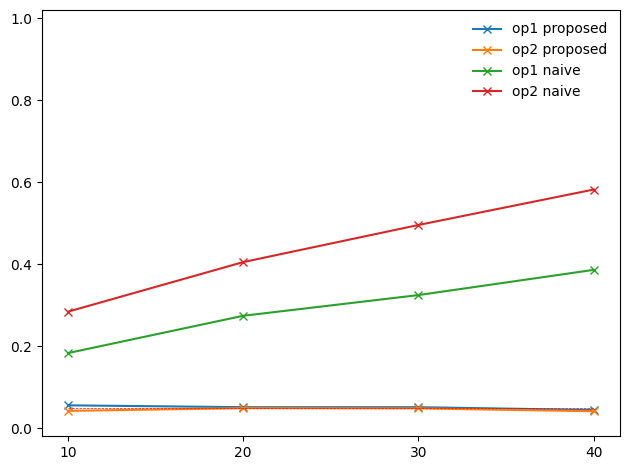

In [54]:
# type I error rate when changing p, not cv
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

num = 2000

op1 = []
op2 = []
op1naive = []
op2naive = []

ps = [10, 20, 30, 40]
for p in ps:
    with open(f'results_op1/200_{p}_0.0_0.pkl', 'rb') as f:
        results = pickle.load(f)
    assert len(results) == num
    p_list = np.array([result.p_value for result in results])
    stats = np.array([result.stat for result in results])
    op1.append(np.mean(p_list < 0.05))
    op1naive.append(np.mean(np.abs(stats) > norm.ppf(0.975)))

    with open(f'results_op2/200_{p}_0.0_0.pkl', 'rb') as f:
        results = pickle.load(f)
    assert len(results) == num
    p_list = np.array([result.p_value for result in results])
    stats = np.array([result.stat for result in results])
    op2.append(np.mean(p_list < 0.05))
    op2naive.append(np.mean(np.abs(stats) > norm.ppf(0.975)))

plt.plot(ps, op1, label='op1 proposed', marker="x")
plt.plot(ps, op2, label='op2 proposed', marker="x")
plt.plot(ps, op1naive, label='op1 naive', marker="x")
plt.plot(ps, op2naive, label='op2 naive', marker="x")
plt.plot(ps, 0.05 * np.ones(len(ps)), lw=0.5, linestyle='--', color='red')
plt.ylim(-0.02, 1.02)
plt.xticks(ps)
plt.legend(frameon=False)
plt.show()


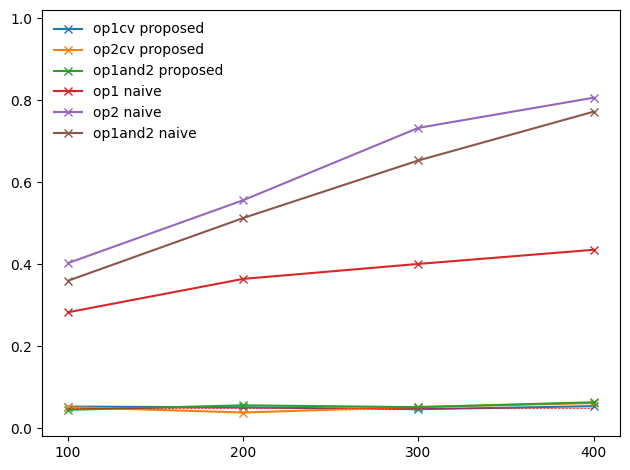

In [55]:
# type I error rate when changing n, cv
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

num = 2000

op1 = []
op2 = []
op1and2 = []
op1naive = []
op2naive = []
op1and2naive = []

ns = [100, 200, 300, 400]
for n in ns:
    with open(f'results_cv_op1/{n}_20_0.0_0.pkl', 'rb') as f:
        results = pickle.load(f)
    assert len(results) == num
    p_list = np.array([result.p_value for result in results])
    stats = np.array([result.stat for result in results])
    op1.append(np.mean(p_list < 0.05))
    op1naive.append(np.mean(np.abs(stats) > norm.ppf(0.975)))

    with open(f'results_cv_op2/{n}_20_0.0_0.pkl', 'rb') as f:
        results = pickle.load(f)
    assert len(results) == num
    p_list = np.array([result.p_value for result in results])
    stats = np.array([result.stat for result in results])
    op2.append(np.mean(p_list < 0.05))
    op2naive.append(np.mean(np.abs(stats) > norm.ppf(0.975)))

    with open(f'results_cv_op1and2/{n}_20_0.0_0.pkl', 'rb') as f:
        results = pickle.load(f)
    assert len(results) == num
    p_list = np.array([result.p_value for result in results])
    stats = np.array([result.stat for result in results])
    op1and2.append(np.mean(p_list < 0.05))
    op1and2naive.append(np.mean(np.abs(stats) > norm.ppf(0.975)))

plt.plot(ns, op1, label='op1cv proposed', marker="x")
plt.plot(ns, op2, label='op2cv proposed', marker="x")
plt.plot(ns, op1and2, label='op1and2 proposed', marker="x")
plt.plot(ns, op1naive, label='op1 naive', marker="x")
plt.plot(ns, op2naive, label='op2 naive', marker="x")
plt.plot(ns, op1and2naive, label='op1and2 naive', marker="x")
plt.plot(ns, 0.05 * np.ones(len(ns)), lw=0.5, linestyle='--', color='red')
plt.ylim(-0.02, 1.02)
plt.xticks(ns)
plt.legend(frameon=False)
plt.show()

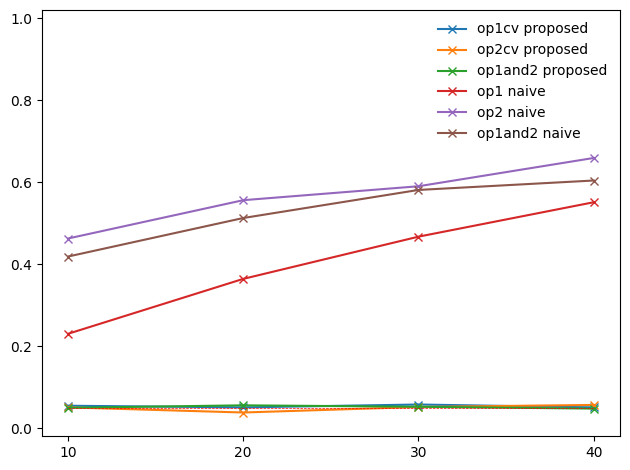

In [56]:
# type I error rate when changing p, cv
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

num = 2000

op1 = []
op2 = []
op1and2 = []
op1naive = []
op2naive = []
op1and2naive = []

ps = [10, 20, 30, 40]
for p in ps:
    with open(f'results_cv_op1/200_{p}_0.0_0.pkl', 'rb') as f:
        results = pickle.load(f)
    assert len(results) == num
    p_list = np.array([result.p_value for result in results])
    stats = np.array([result.stat for result in results])
    op1.append(np.mean(p_list < 0.05))
    op1naive.append(np.mean(np.abs(stats) > norm.ppf(0.975)))

    with open(f'results_cv_op2/200_{p}_0.0_0.pkl', 'rb') as f:
        results = pickle.load(f)
    assert len(results) == num
    p_list = np.array([result.p_value for result in results])
    stats = np.array([result.stat for result in results])
    op2.append(np.mean(p_list < 0.05))
    op2naive.append(np.mean(np.abs(stats) > norm.ppf(0.975)))

    with open(f'results_cv_op1and2/200_{p}_0.0_0.pkl', 'rb') as f:
        results = pickle.load(f)
    assert len(results) == num
    p_list = np.array([result.p_value for result in results])
    stats = np.array([result.stat for result in results])
    op1and2.append(np.mean(p_list < 0.05))
    op1and2naive.append(np.mean(np.abs(stats) > norm.ppf(0.975)))

plt.plot(ps, op1, label='op1cv proposed', marker="x")
plt.plot(ps, op2, label='op2cv proposed', marker="x")
plt.plot(ps, op1and2, label='op1and2 proposed', marker="x")
plt.plot(ps, op1naive, label='op1 naive', marker="x")
plt.plot(ps, op2naive, label='op2 naive', marker="x")
plt.plot(ps, op1and2naive, label='op1and2 naive', marker="x")
plt.plot(ps, 0.05 * np.ones(len(ps)), lw=0.5, linestyle='--', color='red')
plt.ylim(-0.02, 1.02)
plt.xticks(ps)
plt.legend(frameon=False)
plt.show()

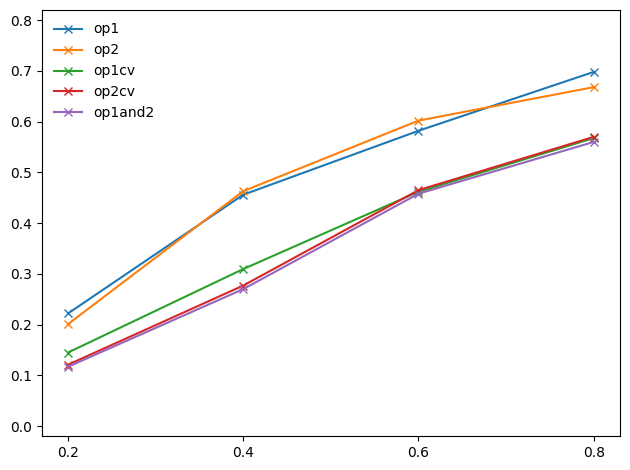

In [2]:
# power when changing signal
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

num = 1000

op1 = []
op2 = []
op1cv = []
op2cv = []
op1and2 = []

op1ds = []
op2ds = []
op1cvds = []
op2cvds = []
op1and2ds = []

deltas = [0.2, 0.4, 0.6, 0.8]
for delta in deltas:
    with open(f'results_op1/200_20_{delta}_0.pkl', 'rb') as f:
        results = pickle.load(f)
    assert len(results) == num
    p_list = np.array([result.p_value for result in results])
    stats = np.array([result.stat for result in results])
    op1.append(np.mean(p_list < 0.05))

    with open(f'results_op2/200_20_{delta}_0.pkl', 'rb') as f:
        results = pickle.load(f)
    assert len(results) == num
    p_list = np.array([result.p_value for result in results])
    stats = np.array([result.stat for result in results])
    op2.append(np.mean(p_list < 0.05))

    with open(f'results_cv_op1/200_20_{delta}_0.pkl', 'rb') as f:
        results = pickle.load(f)
    # assert len(results) == num, len(results)
    p_list = np.array([result.p_value for result in results])
    op1cv.append(np.mean(p_list < 0.05))

    with open(f'results_cv_op2/200_20_{delta}_0.pkl', 'rb') as f:
        results = pickle.load(f)
    assert len(results) == num
    p_list = np.array([result.p_value for result in results])
    op2cv.append(np.mean(p_list < 0.05))

    with open(f'results_cv_op1and2/200_20_{delta}_0.pkl', 'rb') as f:
        results = pickle.load(f)
    assert len(results) == num
    p_list = np.array([result.p_value for result in results])
    op1and2.append(np.mean(p_list < 0.05))

    # data split
    with open(f'results_ds/op1_200_20_{delta}_0.pkl', 'rb') as f:
        results = pickle.load(f)
    # assert len(results) == num
    p_list = np.array(results)
    op1ds.append(np.mean(p_list < 0.05))

    with open(f'results_ds/op2_200_20_{delta}_0.pkl', 'rb') as f:
        results = pickle.load(f)
    # assert len(results) == num
    p_list = np.array(results)
    op2ds.append(np.mean(p_list < 0.05))

    with open(f'results_ds/op1cv_200_20_{delta}_0.pkl', 'rb') as f:
        results = pickle.load(f)
    # assert len(results) == num
    p_list = np.array(results)
    op1cvds.append(np.mean(p_list < 0.05))

    with open(f'results_ds/op2cv_200_20_{delta}_0.pkl', 'rb') as f:
        results = pickle.load(f)
    # assert len(results) == num
    p_list = np.array(results)
    op2cvds.append(np.mean(p_list < 0.05))

    with open(f'results_ds/op1and2_200_20_{delta}_0.pkl', 'rb') as f:
        results = pickle.load(f)
    # assert len(results) == num
    p_list = np.array(results)
    op1and2ds.append(np.mean(p_list < 0.05))

plt.plot(deltas, op1, label='op1', marker="x")
plt.plot(deltas, op2, label='op2', marker="x")
plt.plot(deltas, op1cv, label='op1cv', marker="x")
plt.plot(deltas, op2cv, label='op2cv', marker="x")
plt.plot(deltas, op1and2, label='op1and2', marker="x")

# plt.plot(deltas, op1ds, label='op1 (ds)', marker="x")
# plt.plot(deltas, op2ds, label='op2 (ds)', marker="x")
# plt.plot(deltas, op1cvds, label='op1cv (ds)', marker="x")
# plt.plot(deltas, op2cvds, label='op2cv (ds)', marker="x")
# plt.plot(deltas, op1and2ds, label='op1and2 (ds)', marker="x")
# plt.plot(deltas, 0.05 * np.ones(len(deltas)), lw=0.5, linestyle='--', color='red')
plt.ylim(-0.02, 0.82)
plt.xticks(deltas)
plt.legend(frameon=False)
plt.savefig("fullpower.pdf", bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()


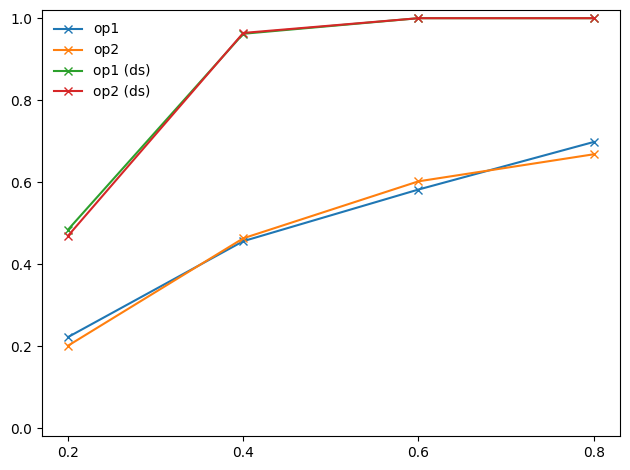

In [2]:
# power when changing signal
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

num = 1000

op1 = []
op2 = []

op1ds = []
op2ds = []

n, p = 200, 20
deltas = [0.2, 0.4, 0.6, 0.8]
for delta in deltas:
    with open(f'results_op1/{n}_{p}_{delta}_0.pkl', 'rb') as f:
        results = pickle.load(f)
    assert len(results) == num
    p_list = np.array([result.p_value for result in results])
    op1.append(np.mean(p_list < 0.05))

    with open(f'results_op2/{n}_{p}_{delta}_0.pkl', 'rb') as f:
        results = pickle.load(f)
    assert len(results) == num
    p_list = np.array([result.p_value for result in results])
    op2.append(np.mean(p_list < 0.05))

    # data split
    with open(f'results_ds/op1_{n}_{p}_{delta}_0.pkl', 'rb') as f:
        results = pickle.load(f)
    assert len(results) == num
    p_list = np.array(results)
    op1ds.append(np.mean(p_list < 0.05))

    with open(f'results_ds/op2_{n}_{p}_{delta}_0.pkl', 'rb') as f:
        results = pickle.load(f)
    assert len(results) == num
    p_list = np.array(results)
    op2ds.append(np.mean(p_list < 0.05))


plt.plot(deltas, op1, label='op1', marker="x")
plt.plot(deltas, op2, label='op2', marker="x")

plt.plot(deltas, op1ds, label='op1 (ds)', marker="x")
plt.plot(deltas, op2ds, label='op2 (ds)', marker="x")
# plt.plot(deltas, 0.05 * np.ones(len(deltas)), lw=0.5, linestyle='--', color='red')
plt.ylim(-0.02, 1.02)
plt.xticks(deltas)
plt.legend(frameon=False)
plt.savefig('power.pdf', bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()
